# Projet de Deep Learning:
### Modèle de diffusion conditionel pour la génération de chiffres manuscrits

- Un fichier README.md est fournie pour expliquer le code.
- Un rapport pdf est fourni pour expliquer le projet.

### Chargement des données

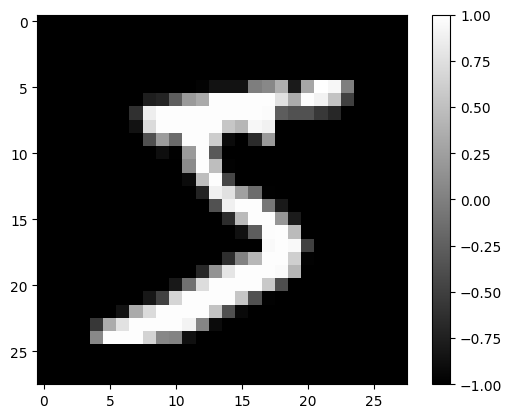

In [1]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt
from torch import nn
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

preprocess = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)
batch_size = 128
dataset = MNIST(root='', train=True, download=True, transform=preprocess)
loader_train = DataLoader(dataset, batch_size, shuffle=True)
plt.imshow(dataset[0][0].squeeze(), cmap='gray')
plt.colorbar()
plt.show()

### Exemple de prédiction d'un UNet conditionnel non entraîné sur MNIST

Input shape: torch.Size([1, 1, 28, 28])
Output shape: torch.Size([1, 1, 28, 28])


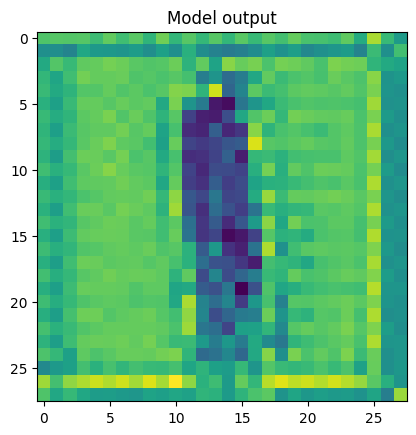

In [2]:
from unet import Conditional_UNet

model = Conditional_UNet(in_channels=1, out_channels=1, block_out_channels=[64, 128],)

sample_image, label = dataset[8]
sample_image = sample_image.unsqueeze(0)
print("Input shape:", sample_image.shape)
print("Output shape:", model(sample_image, torch.ones(1), torch.ones(1, dtype=torch.long)*label).shape)
plt.imshow(model(sample_image, torch.ones(1), torch.ones(1, dtype=torch.long)*label).squeeze().detach().numpy())
plt.title("Model output")
plt.show()

### Illustration de la forward diffusion et la backward diffusion

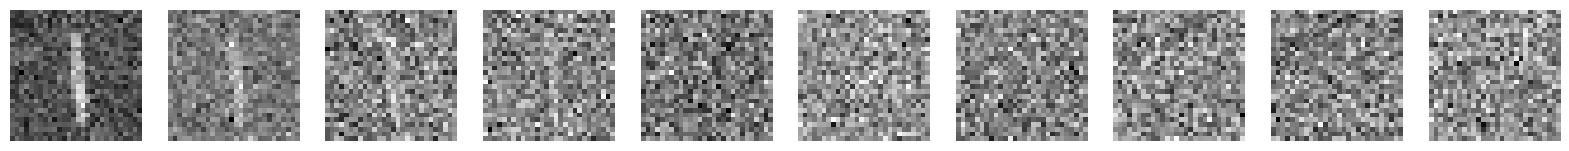

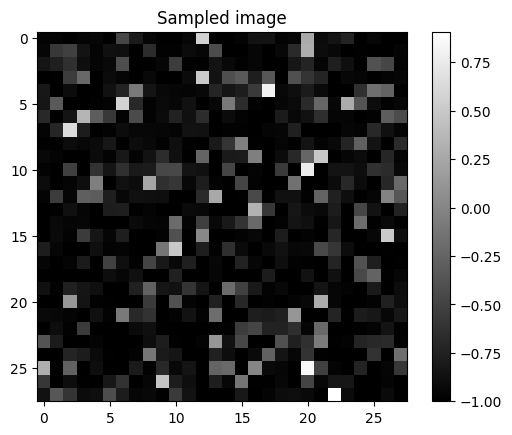

In [3]:
from ddpm import Conditional_DDPM
        
model = Conditional_DDPM(in_channels=1, out_channels=1, block_out_channels=[64, 128], device=device)
model.to(device)
sample_image, label = dataset[8]
sample_image = sample_image.unsqueeze(0).to(device)
noised_image, noise = model(sample_image, 1)

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i,t in enumerate([99, 199, 299, 399, 499, 599, 699, 799, 899, 999]):
    noised_image = model(sample_image, t)
    axes[i].imshow(noised_image[0].squeeze().detach().cpu().numpy(), cmap='gray')
    axes[i].axis('off')

output = model.sampling(1000, torch.LongTensor([label]).to(device), n_samples=1)
plt.figure()
plt.imshow(output.squeeze().detach().cpu().numpy(), cmap='gray')
plt.colorbar()
plt.title("Sampled image")
plt.show()

### Entraînement du modèle

Dans les affichages des générations effectuées par le modèle au cours de l'entraînement, celui-ci est conditionné à générer des images de la classe 1 (chiffre 1).

469it [00:18, 25.43it/s]


Epoch: 0, Loss: 0.5533472895622253


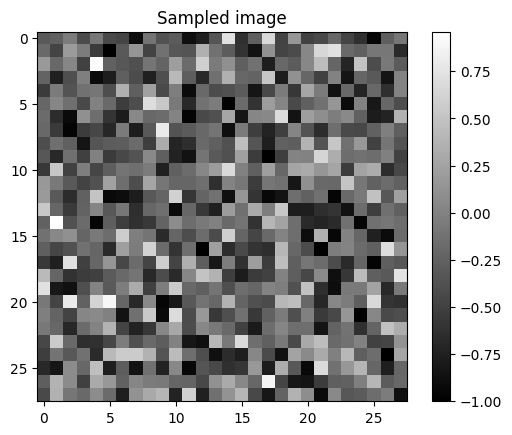

469it [00:18, 25.91it/s]


Epoch: 1, Loss: 0.4331211447715759


469it [00:18, 25.85it/s]


Epoch: 2, Loss: 0.33920618891716003


469it [00:18, 26.06it/s]


Epoch: 3, Loss: 0.2813841998577118


469it [00:17, 26.07it/s]


Epoch: 4, Loss: 0.195795476436615


469it [00:18, 25.63it/s]


Epoch: 5, Loss: 0.1623637080192566


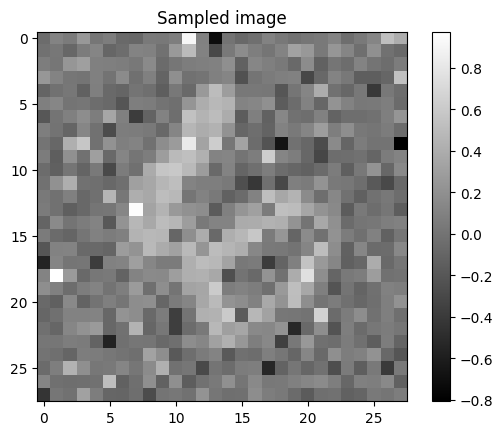

469it [00:18, 25.47it/s]


Epoch: 6, Loss: 0.12019091099500656


469it [00:18, 25.35it/s]


Epoch: 7, Loss: 0.12256582826375961


469it [00:18, 25.55it/s]


Epoch: 8, Loss: 0.13318219780921936


469it [00:18, 25.72it/s]


Epoch: 9, Loss: 0.06596986949443817


469it [00:18, 25.60it/s]


Epoch: 10, Loss: 0.054541151970624924


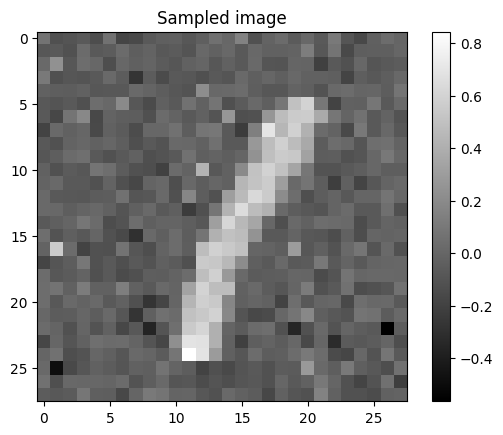

469it [00:18, 25.92it/s]


Epoch: 11, Loss: 0.03814021870493889


469it [00:18, 26.01it/s]


Epoch: 12, Loss: 0.049219388514757156


469it [00:17, 26.24it/s]


Epoch: 13, Loss: 0.02044527418911457


469it [00:18, 25.34it/s]


Epoch: 14, Loss: 0.15279774367809296


469it [00:18, 25.70it/s]


Epoch: 15, Loss: 0.026751620694994926


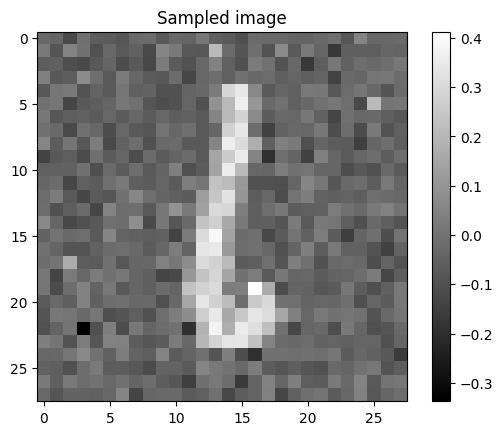

469it [00:18, 25.64it/s]


Epoch: 16, Loss: 0.010169248096644878


469it [00:18, 25.61it/s]


Epoch: 17, Loss: 0.010952592827379704


469it [00:18, 25.91it/s]


Epoch: 18, Loss: 0.006737185642123222


469it [00:18, 25.90it/s]


Epoch: 19, Loss: 0.01817905530333519


469it [00:18, 25.96it/s]


Epoch: 20, Loss: 0.004758793395012617


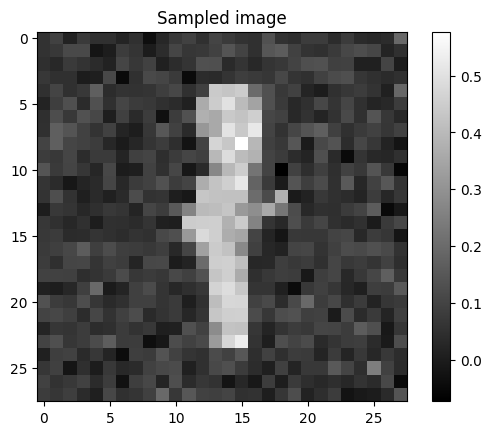

469it [00:18, 26.03it/s]


Epoch: 21, Loss: 0.0038529837038367987


469it [00:18, 25.99it/s]


Epoch: 22, Loss: 0.0031308948528021574


469it [00:17, 26.25it/s]


Epoch: 23, Loss: 0.0022661262191832066


469it [00:18, 25.81it/s]


Epoch: 24, Loss: 0.028256617486476898


469it [00:18, 26.05it/s]


Epoch: 25, Loss: 0.0325118824839592


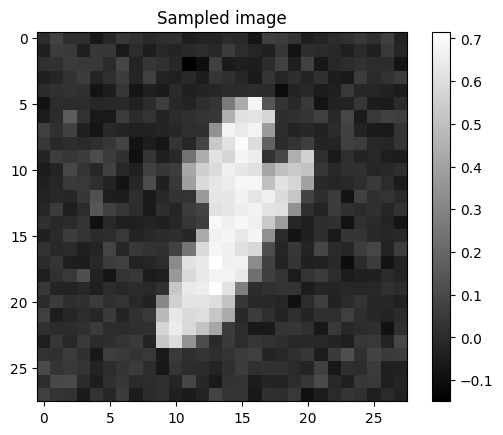

469it [00:18, 25.89it/s]


Epoch: 26, Loss: 0.052513692528009415


469it [00:18, 25.66it/s]


Epoch: 27, Loss: 0.0026030591689050198


469it [00:18, 25.82it/s]


Epoch: 28, Loss: 0.0016802875325083733


469it [00:17, 26.09it/s]


Epoch: 29, Loss: 0.001356520806439221


469it [00:18, 25.39it/s]


Epoch: 30, Loss: 0.007931399159133434


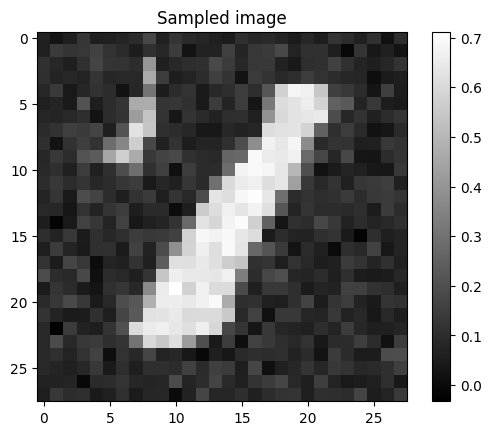

469it [00:18, 25.89it/s]


Epoch: 31, Loss: 0.027613993734121323


469it [00:18, 26.00it/s]


Epoch: 32, Loss: 0.00636310363188386


469it [00:18, 26.05it/s]


Epoch: 33, Loss: 0.0007802883628755808


469it [00:17, 26.07it/s]


Epoch: 34, Loss: 0.0009338291129097342


469it [00:18, 25.33it/s]


Epoch: 35, Loss: 0.0005912252236157656


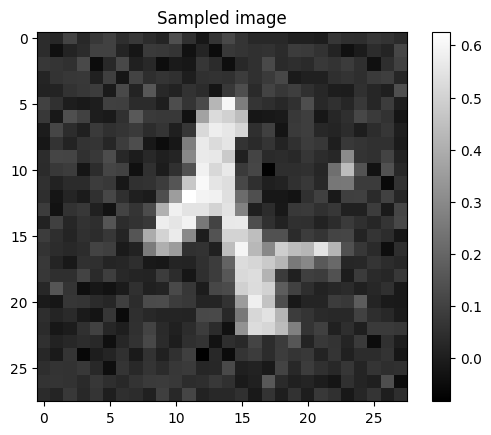

469it [00:18, 25.42it/s]


Epoch: 36, Loss: 0.016093013808131218


469it [00:18, 25.69it/s]


Epoch: 37, Loss: 0.0033725565299391747


469it [00:18, 25.40it/s]


Epoch: 38, Loss: 0.06283453851938248


469it [00:18, 25.96it/s]


Epoch: 39, Loss: 0.019980954006314278


469it [00:18, 25.98it/s]


Epoch: 40, Loss: 0.07777531445026398


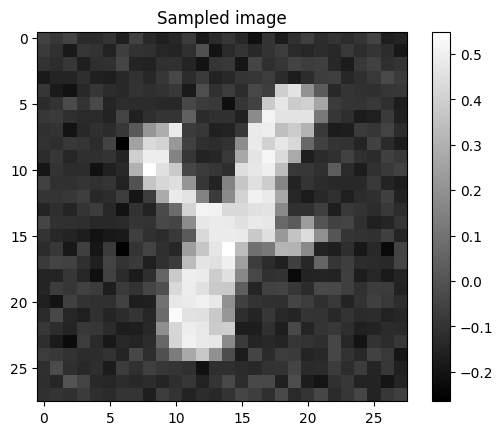

469it [00:18, 25.91it/s]


Epoch: 41, Loss: 0.006092358380556107
Epoch 00042: reducing learning rate of group 0 to 5.0000e-04.


469it [00:17, 26.23it/s]


Epoch: 42, Loss: 0.026594465598464012


469it [00:18, 25.92it/s]


Epoch: 43, Loss: 0.024541368708014488


469it [00:17, 26.15it/s]


Epoch: 44, Loss: 0.00048769984277896583


469it [00:17, 26.11it/s]


Epoch: 45, Loss: 0.0006394728552550077


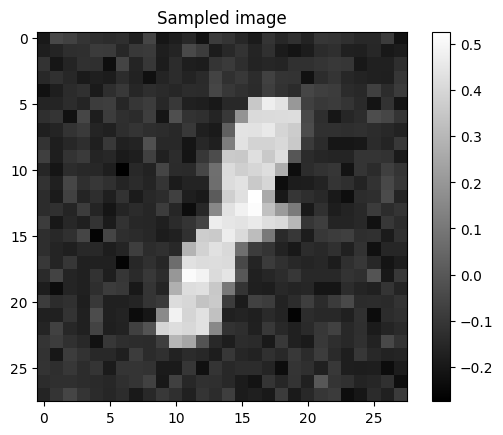

469it [00:17, 26.07it/s]


Epoch: 46, Loss: 0.0003436524129938334


469it [00:18, 25.98it/s]


Epoch: 47, Loss: 0.0017854501493275166


469it [00:17, 26.13it/s]


Epoch: 48, Loss: 0.0031242268159985542


469it [00:17, 26.06it/s]


Epoch: 49, Loss: 0.03153929114341736


469it [00:18, 26.02it/s]


Epoch: 50, Loss: 0.012799650430679321


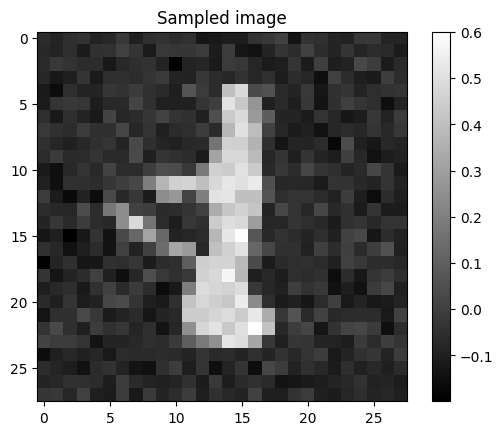

469it [00:18, 25.76it/s]


Epoch: 51, Loss: 0.0005189803778193891


469it [00:18, 26.01it/s]


Epoch: 52, Loss: 0.0014214831171557307
Epoch 00053: reducing learning rate of group 0 to 2.5000e-04.


469it [00:18, 25.98it/s]


Epoch: 53, Loss: 0.011423501186072826


469it [00:18, 25.78it/s]


Epoch: 54, Loss: 0.0003985062357969582


469it [00:18, 25.81it/s]


Epoch: 55, Loss: 0.07307613641023636


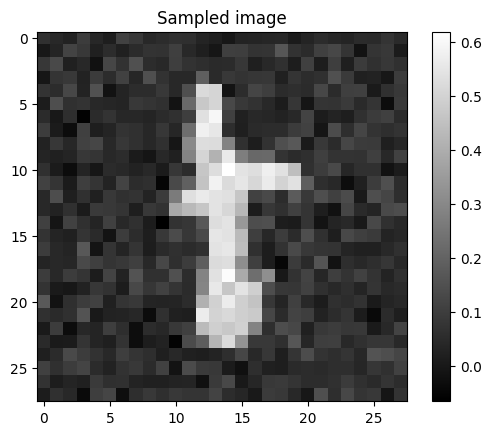

469it [00:18, 25.96it/s]


Epoch: 56, Loss: 0.00041780172614380717


469it [00:18, 25.83it/s]


Epoch: 57, Loss: 0.03087661974132061


469it [00:18, 25.88it/s]


Epoch: 58, Loss: 0.0014828385319560766
Epoch 00059: reducing learning rate of group 0 to 1.2500e-04.


469it [00:18, 26.03it/s]


Epoch: 59, Loss: 0.005519529338926077


469it [00:17, 26.19it/s]


Epoch: 60, Loss: 0.014000610448420048


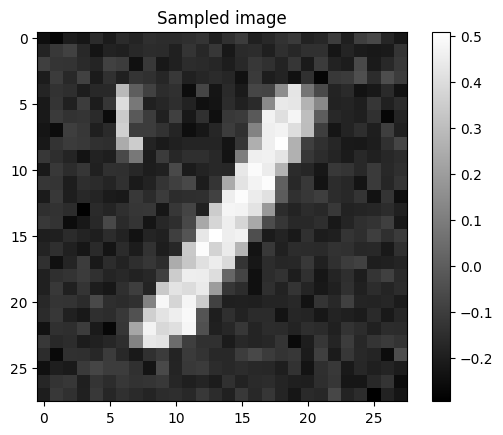

469it [00:18, 25.75it/s]


Epoch: 61, Loss: 0.02707657217979431


469it [00:17, 26.06it/s]


Epoch: 62, Loss: 0.028834693133831024


469it [00:17, 26.12it/s]


Epoch: 63, Loss: 0.006472034379839897


469it [00:17, 26.13it/s]


Epoch: 64, Loss: 0.0007224188884720206
Epoch 00065: reducing learning rate of group 0 to 6.2500e-05.


469it [00:17, 26.13it/s]


Epoch: 65, Loss: 0.0003092002007178962


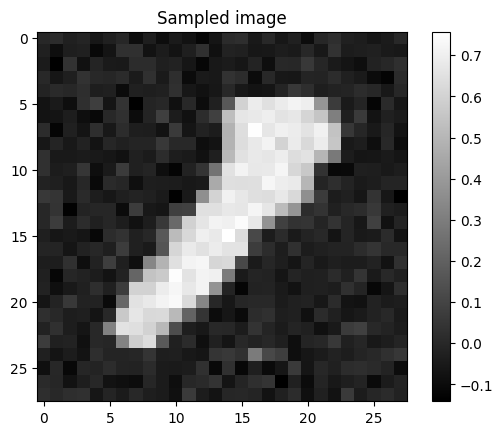

469it [00:18, 25.93it/s]


Epoch: 66, Loss: 0.001631004037335515


469it [00:18, 25.95it/s]


Epoch: 67, Loss: 0.007459358312189579


469it [00:18, 26.01it/s]


Epoch: 68, Loss: 0.03183456137776375


469it [00:18, 25.99it/s]


Epoch: 69, Loss: 0.01179600227624178


469it [00:18, 25.91it/s]


Epoch: 70, Loss: 0.021712111309170723


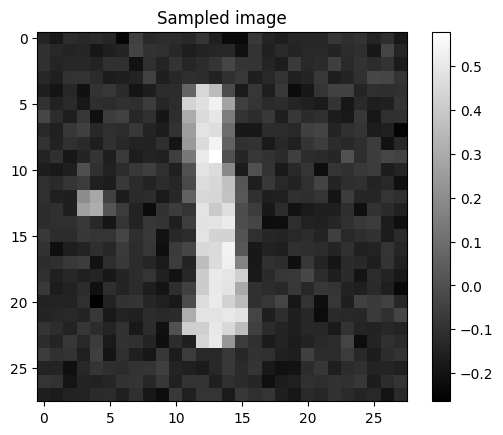

469it [00:18, 25.91it/s]


Epoch: 71, Loss: 0.09367584437131882
Epoch 00072: reducing learning rate of group 0 to 3.1250e-05.


469it [00:18, 25.88it/s]


Epoch: 72, Loss: 0.0004187186132185161


469it [00:17, 26.13it/s]


Epoch: 73, Loss: 0.017489776015281677


469it [00:18, 25.93it/s]


Epoch: 74, Loss: 0.11835531145334244


469it [00:18, 25.95it/s]


Epoch: 75, Loss: 0.0011961922282353044


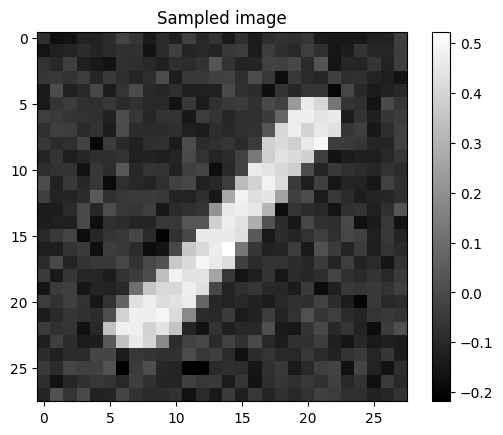

469it [00:18, 25.77it/s]


Epoch: 76, Loss: 0.01408296823501587


469it [00:18, 25.77it/s]


Epoch: 77, Loss: 0.0546068400144577
Epoch 00078: reducing learning rate of group 0 to 1.5625e-05.


469it [00:18, 25.81it/s]


Epoch: 78, Loss: 0.028815554454922676


469it [00:18, 25.99it/s]


Epoch: 79, Loss: 0.0006759434472769499


469it [00:18, 25.37it/s]


Epoch: 80, Loss: 0.007551867980509996


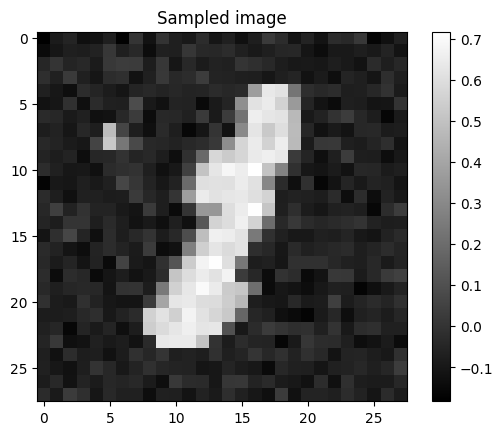

469it [00:17, 26.39it/s]


Epoch: 81, Loss: 0.045080166310071945


469it [00:17, 26.63it/s]


Epoch: 82, Loss: 0.013888241723179817


469it [00:17, 26.65it/s]


Epoch: 83, Loss: 0.001843297970481217
Epoch 00084: reducing learning rate of group 0 to 7.8125e-06.


469it [00:17, 26.32it/s]


Epoch: 84, Loss: 0.05175285413861275


469it [00:17, 26.07it/s]


Epoch: 85, Loss: 0.07958181202411652


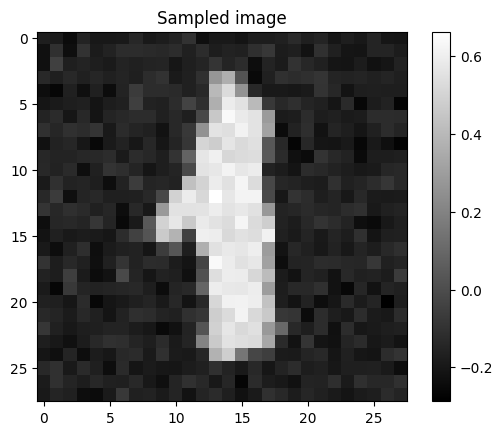

469it [00:17, 26.62it/s]


Epoch: 86, Loss: 0.04119718074798584


469it [00:17, 26.72it/s]


Epoch: 87, Loss: 0.020085355266928673


469it [00:17, 26.47it/s]


Epoch: 88, Loss: 0.00039416717481799424


58it [00:02, 25.60it/s]


KeyboardInterrupt: 

In [4]:
from random import randint, random
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm

def training(model, epochs, criterion, optimizer, loader_train, T = 1000, p_label = 0.1, patience=5):
    '''Training loop for the model.
    model: model to be trained.
    lr: learning rate.
    epochs: number of epochs.
    criterion: loss function.
    optimizer: optimizer to be used.
    loader_train: training data loader
    p_label: probability of discarding conditional labels.'''
    scheduler = ReduceLROnPlateau(optimizer, 'min', patience=patience, verbose=True, factor=0.5, min_lr=1e-6)
    for epoch in range(epochs):
        for i, (images, labels) in tqdm(enumerate(loader_train)):
            images = images.to(device)
            labels = labels.to(device)
            t = randint(0, T-1)
            x_noised, noise = model.forward(images, t)
            optimizer.zero_grad()
            if random() > p_label:
                noise_pred = model.model(x_noised, t, torch.ones(len(labels), dtype=torch.int, device=device)*labels)
            else:
                noise_pred = model.model(x_noised, t, None)
            loss = criterion(noise_pred, noise)
            loss.backward()
            optimizer.step()
        print(f"Epoch: {epoch}, Loss: {loss.item()}")
        if epoch % 5 == 0:
            with torch.no_grad():
                img = model.sampling(1000, c=1, n_samples=2, w=1.0)
                plt.imshow(img[0].squeeze().detach().cpu().numpy(), cmap='gray')
                plt.colorbar()
                plt.title("Sampled image")
                plt.show()
        scheduler.step(loss)
    return model

lr = 1e-3
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
patience = 5
epochs = 200
model = training(model, epochs, criterion, optimizer, loader_train, p_label=0.1, patience=patience)


### Génération d'images

Le modèle est entraîné pour générer des images. On peut choisir la classe $c$ de l'image à générer et on a un hyper-paramètre de $guidance$ $strength$ ($w$). Plus $w$ est grand, plus l'image générée est proche de la classe choisie.

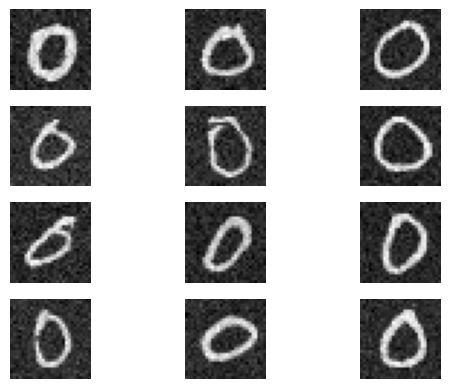

In [10]:
fig, axes = plt.subplots(4, 3)
for j, w in enumerate([0.0, 1.0, 3.0]):
    samples = model.sampling(1000, c=0, n_samples=4, w=w)
    for i in range(4):
        with torch.no_grad():
            axes[i, j].imshow(samples[i].squeeze().detach().cpu().numpy(), cmap='gray')
            axes[i, j].axis('off')
plt.show()
